<a href="https://colab.research.google.com/github/emersoncpp/word2vec/blob/master/Ducks_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifying meanings using BERT
Identifying the different meanings of the word 'duck' using BERT embeddings

Import python resources

In [0]:
import pandas as pd
import numpy as np
!pip install -e git+https://github.com/negedng/bert-embedding#egg=bert_embedding
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline


Obtaining bert_embedding from git+https://github.com/negedng/bert-embedding#egg=bert_embedding
  Updating ./src/bert-embedding clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 32fb23a1398f824aea7c7c9e6ec89843dc7d0c91
  Found existing installation: bert-embedding 1.0.1
    Can't uninstall 'bert-embedding'. No files were found to uninstall.
  Running setup.py develop for bert-embedding


Load csv from GitHub

In [0]:
url = "https://gist.githubusercontent.com/negedng/91c4cb1335a4b2bbc3fcf7aba3c6ecda/raw/3fc0b641caa95ebba986b1313522f59ecd757a2b/ducks2019type3.csv"
df1 = pd.read_csv(url)

In [0]:
from bert_embedding import BertEmbedding
bert_embedding = BertEmbedding(max_seq_length=35)


Generate BERT embedding for every token of every sentence

In [0]:
embs = bert_embedding(df1['Sentence'], filter_spec_tokens=False,)

Select the 'duck' embeddings

In [0]:
duck_embs = []
for row in embs:
    try:
        duck_index = row[0].index('duck')
        duck_embs.append(row[1][duck_index])
    except ValueError:
        print(len(row[0]))

In [0]:
duck_embs = np.array(duck_embs)
duck_embs.shape

(77, 768)

PCA projection to 2D

In [0]:
duck_pca = PCA(n_components=2).fit_transform(duck_embs)
duck_pca.shape

(77, 2)

Plot the results (group to classes)

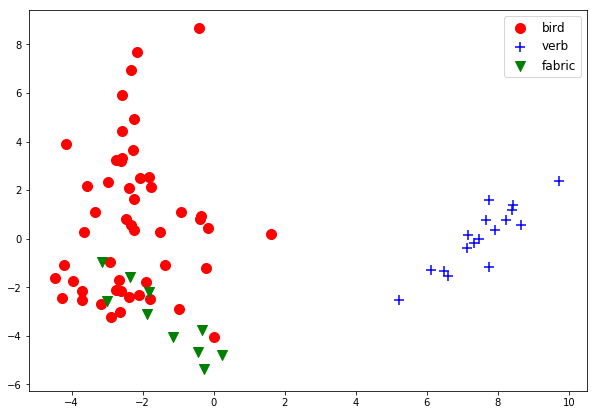

In [0]:
cdict = {0: 'red', 1: 'blue', 2: 'green'}
markers = {0: 'o', 1: '+', 2: 'v'}
labels = {0: 'bird', 1: 'verb', 2: 'fabric'}

scatter_x = duck_pca[:,0]
scatter_y = duck_pca[:,1]
fig, ax = plt.subplots(figsize=(10, 7))
for g in np.unique(df1.Type):
    ix = np.where(df1.Type == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = labels[g], s=100, marker=markers[g])
ax.legend(prop={'size': 12})
plt.show()

Evaluate a k-NN (k-Nearest Neighbour Classifier) model with LOOCV (Leave One Out Cross-Validation)

In [0]:
loocv = model_selection.LeaveOneOut()
model = KNeighborsClassifier(n_neighbors=8)
results = model_selection.cross_val_score(model, duck_embs, df1.Type, cv=loocv)
print("Accuracy: %.3f%% (STDev %.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 92.208% (STDev 26.805%)
